Original shape: (100, 10000)
Reduced shape (PCA): (100, 5)
KMeans Silhouette Score: 0.5573880922394446
Hierarchical Silhouette Score: 0.6111130694046017
DBSCAN Silhouette Score: -1

Cluster Distribution:
KMeans  TrueLabel
0       -1           14
         1            2
1        1           22
        -1           16
2        1           12
        -1           11
3       -1           15
         1            8
Name: count, dtype: int64
Hierarchical  TrueLabel
0             -1           26
               1           10
1              1           22
              -1           16
2              1           12
              -1           11
3             -1            3
Name: count, dtype: int64
DBSCAN  TrueLabel
-1      -1           56
         1           44
Name: count, dtype: int64


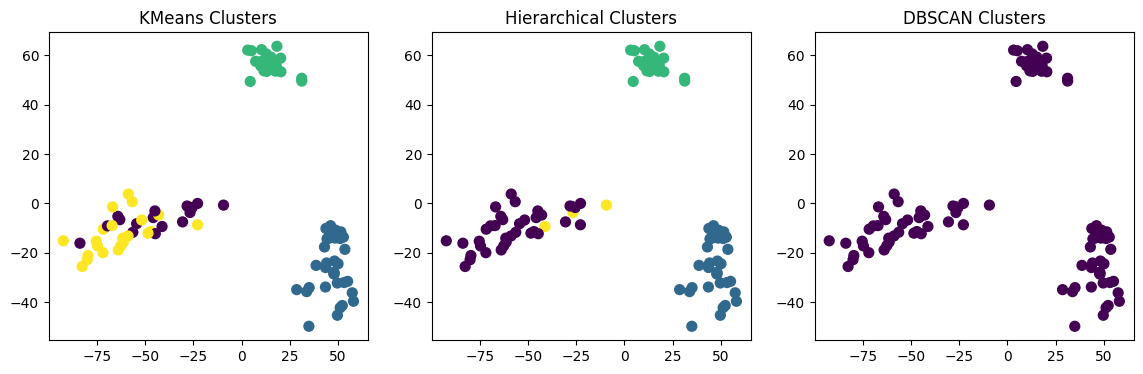

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


df_train = pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_train.csv", sep=" ", header=None)
df_train = df_train.dropna(axis=1, how="all")  # remove empty columns
df_labels = pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_train_labels.csv", header=None)


n_features = df_train.shape[1]
df_train.columns = [f"f{i+1}" for i in range(n_features)]

X = df_train.values
y = df_labels.values.ravel()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape (PCA):", X_pca.shape)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_score = silhouette_score(X_pca, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_score)


hier = AgglomerativeClustering(n_clusters=4, linkage="ward")
hier_labels = hier.fit_predict(X_pca)
hier_score = silhouette_score(X_pca, hier_labels)
print("Hierarchical Silhouette Score:", hier_score)


dbscan_labels = dbscan.fit_predict(X_pca)

if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(X_pca, dbscan_labels)
else:
    dbscan_score = -1 
print("DBSCAN Silhouette Score:", dbscan_score)


results = pd.DataFrame({
    "KMeans": kmeans_labels,
    "Hierarchical": hier_labels,
    "DBSCAN": dbscan_labels,
    "TrueLabel": y
})

print("\nCluster Distribution:")
print(results.groupby("KMeans")["TrueLabel"].value_counts())
print(results.groupby("Hierarchical")["TrueLabel"].value_counts())
print(results.groupby("DBSCAN")["TrueLabel"].value_counts())


plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis", s=50)
plt.title("KMeans Clusters")

plt.subplot(1,3,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=hier_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clusters")

plt.subplot(1,3,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap="viridis", s=50)
plt.title("DBSCAN Clusters")

plt.show()
